<a href="https://colab.research.google.com/github/Lipun101/hotel-booking-data-analysis/blob/main/Hotel_Booking_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Data Analysis**

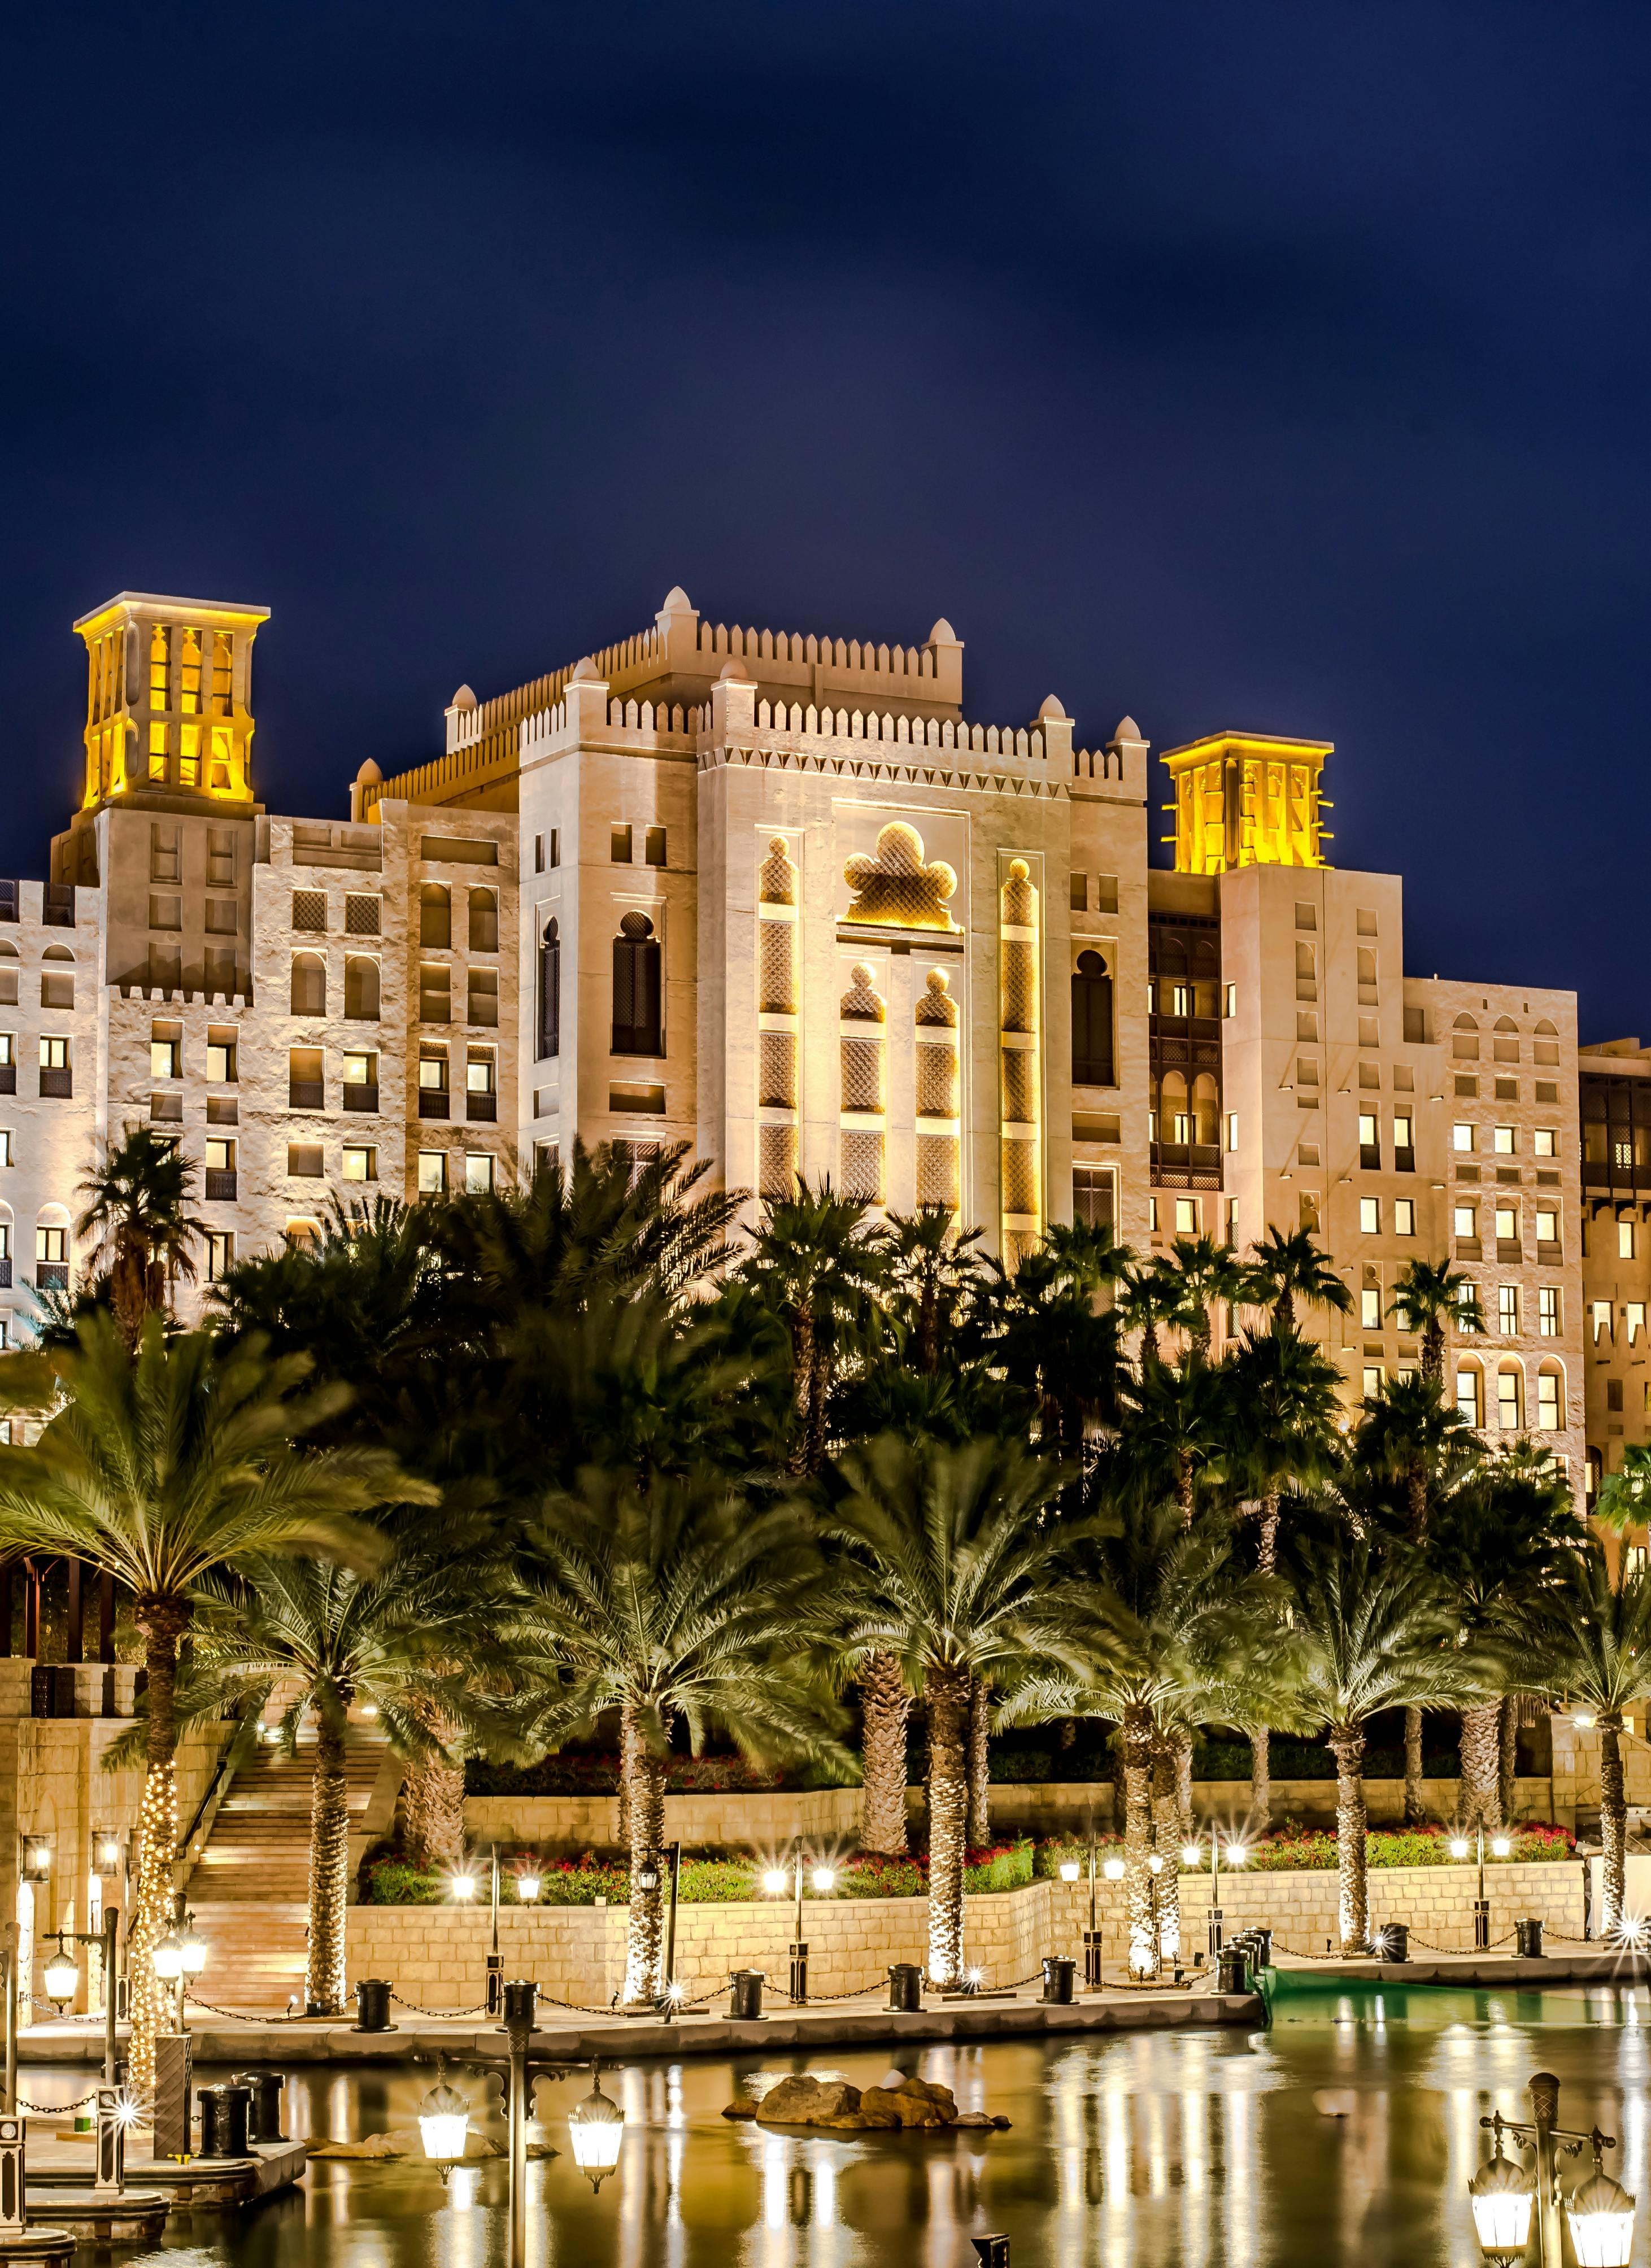

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data set

data = pd.read_csv("/content/drive/MyDrive/Hotel Bookings .csv")
data1 = pd.read_csv("/content/drive/MyDrive/Hotel Bookings .csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
data.shape

(119390, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.duplicated().sum()

31994

In [6]:
result = data[data.duplicated()]
print(result)

               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July                        27   
43                   July     

In [7]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
data['children'].fillna(0, inplace = True)
data['company'].fillna(0, inplace = True)
data['agent'].fillna(0, inplace = True)

# replacing null values in country column with 'NA'

data['country'].fillna('NA', inplace = True)

In [9]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [10]:
# check the size of duplicate data

data[data.duplicated()].shape

(31994, 32)

In [11]:
# dropping the duplicates rows

data.drop_duplicates(inplace =  True)

In [12]:
data.shape    # after dropping the duplicates

(87396, 32)

# **Comparing Bookings of Week days and Weekends**

In [13]:
sum1 = data['stays_in_week_nights'].sum()
sum2 = data['stays_in_weekend_nights'].sum()

print(f"total number of week nights is {sum1}")
print(f"total number of weekend nights is {sum2}")

if sum1 > sum2:
  print("Bookings are higher in weekdays")
else:
  print("Bookings are higher in weekends")

total number of week nights is 229449
total number of weekend nights is 87856
Bookings are higher in weekdays


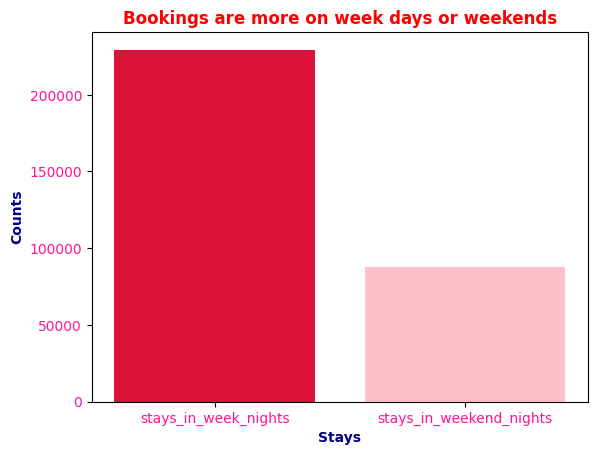

In [14]:
# bar plot

x = ["stays_in_week_nights", "stays_in_weekend_nights"]
y = [sum1, sum2]
plt.bar(x,y, color= ["crimson", "pink"])
plt.xlabel("Stays", color = "darkblue", weight = "bold")
plt.title("Bookings are more on week days or weekends", color = 'red', weight = "bold")
plt.xticks(color = "deeppink")
plt.ylabel("Counts", color = "darkblue", weight = "bold")
plt.yticks(color = "deeppink")
plt.show()

Analysis of the data reveals that weekday nights (Monday to Thursday) account for a significantly higher number of bookings, with a total of 229,449 nights, compared to weekend nights (Friday to Sunday) with 87,856 nights. This suggests that the majority of bookings occur on weekdays, indicating a strong demand for accommodations during the week, likely driven by business travel or other weekday activities. This insight can inform pricing strategies, inventory management, and marketing efforts to optimize revenue and meet customer needs.

# **Months and their Booking Counts**

In [15]:

print(data['arrival_date_month'].value_counts())

arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64


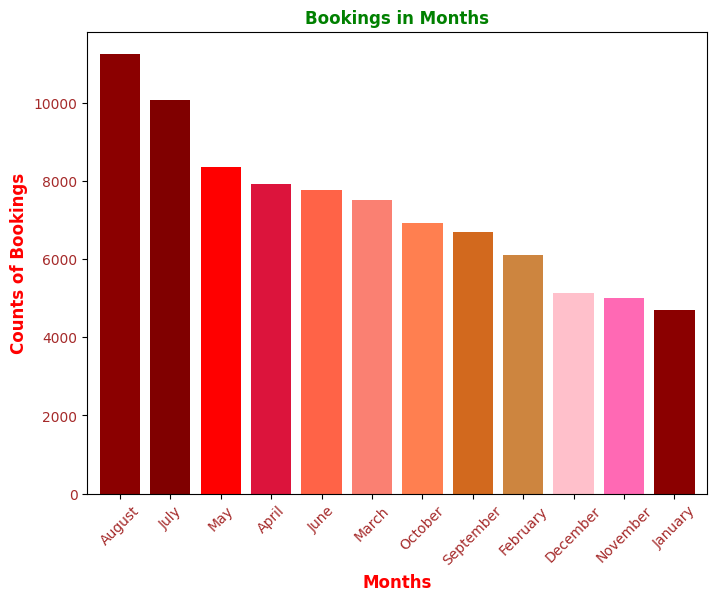

In [16]:
plt.figure(figsize=(8,6))

data['arrival_date_month'].value_counts().plot(kind = 'bar',
                                              color = ['darkred', 'maroon', 'red', 'crimson', 'tomato', 'salmon','coral', "chocolate", "peru", "pink", "hotpink"],
                                              width=0.8)
plt.title("Bookings in Months", weight = 'bold', color = "g")
plt.xlabel("Months", color = 'r', weight = 'bold', fontsize = 12)
plt.xticks(color = "brown", rotation = 45)
plt.ylabel("Counts of Bookings", color = 'r', weight = 'bold', fontsize = 12)
plt.yticks(color = "brown")
plt.show()




Analysis of arrival date months reveals a clear seasonal trend, with peak arrivals in:

1. August (11,257)
2. July (10,057)
3. May (8,355)

These summer months account for the highest number of arrivals, indicating a strong demand for accommodations during the summer season. In contrast, the winter months (December, January, and February) show significantly lower arrival numbers, suggesting a slower season. This insight can inform pricing strategies, inventory management, and marketing efforts to optimize revenue and meet customer needs.

# **Distribution of Bookings over Hotel types**

          hotel  No_of_booking
0    City Hotel          53428
1  Resort Hotel          33968


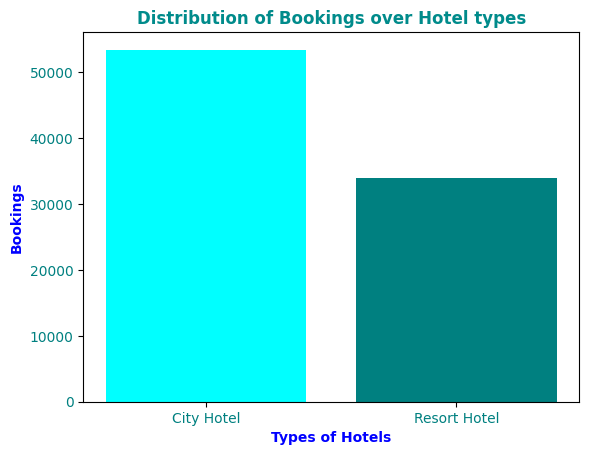

In [17]:
res = data.groupby(['hotel']).size().reset_index(name = 'No_of_booking')
print(res)
bar = plt.bar(res['hotel'], res['No_of_booking'], color = ['cyan', 'teal'])
plt.title("Distribution of Bookings over Hotel types", color='darkcyan', weight = 'bold')
plt.xlabel("Types of Hotels", weight = 'bold', color = 'blue')
plt.xticks(color = 'teal')
plt.ylabel("Bookings", weight = 'bold', color = 'blue')
plt.yticks(color = 'teal')
plt.show()


This suggests that City Hotels are significantly more popular among customers, likely due to their convenient location and accessibility. Resort Hotels, on the other hand, may appeal to customers seeking a more relaxed, leisurely experience. This insight can inform hotel development strategies, marketing efforts, and resource allocation to meet customer preferences."

   is_canceled         hotel  No_of_booking
0            0    City Hotel          37379
1            0  Resort Hotel          25992
2            1    City Hotel          16049
3            1  Resort Hotel           7976


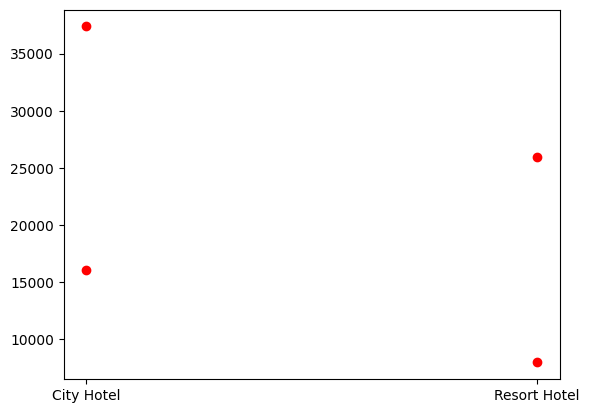

In [18]:
res = data.groupby(['is_canceled', 'hotel']).size().reset_index(name = 'No_of_booking')
print(res)

plt.scatter(res['hotel'], res['No_of_booking'], color = 'red', marker= 'o')
plt.show()

This suggests that City Hotels are more prone to cancellations, possibly due to their location or customer preferences. Resort Hotels, on the other hand, may have a more stable customer base or offer services that reduce the likelihood of cancellations. This insight can inform hotel management strategies to minimize cancellations and optimize revenue.


# **Booking over the Months**

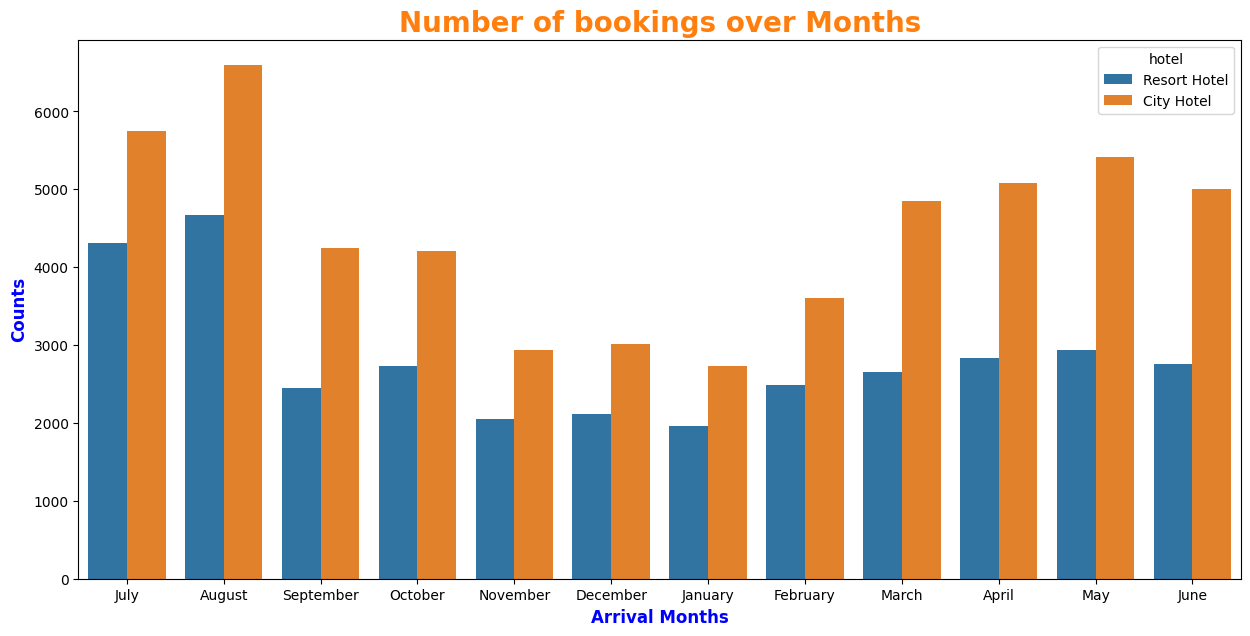

In [20]:
plt.figure(figsize = (15,7))
sns.countplot(x = data['arrival_date_month'], hue = data['hotel'])
plt.title("Number of bookings over Months", color = 'tab:orange', weight = 'bold', fontsize = 20)
plt.xlabel("Arrival Months", color = 'blue', weight = 'bold', fontsize = 12)
plt.ylabel("Counts", color = 'blue', weight = 'bold', fontsize = 12)
plt.show()

# **Distribution of cancellation over week numbers**

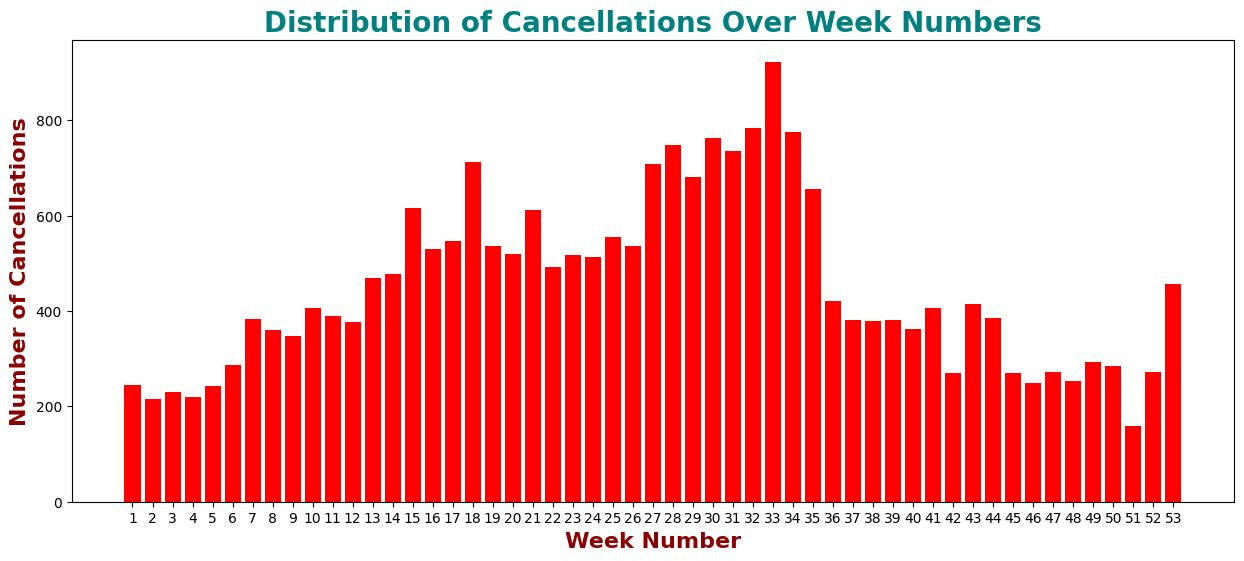

In [21]:
# data.groupby(['arrival_date_week_number', 'is_canceled']).size()


canceled  = data[data['is_canceled'] == 1]
total_cancellations_per_week = canceled.groupby('arrival_date_week_number').size().reset_index(name = 'count')
# print(total_cancellations_per_week)

plt.figure(figsize=(15, 6))
plt.bar(total_cancellations_per_week['arrival_date_week_number'], total_cancellations_per_week['count'], color='red')
plt.title('Distribution of Cancellations Over Week Numbers', color = 'teal', weight = 'bold', fontsize = 20)
plt.xlabel('Week Number', color = 'darkred', weight = 'bold', fontsize = 16)
plt.ylabel('Number of Cancellations', color = 'darkred', weight = 'bold', fontsize = 16)

plt.xticks(total_cancellations_per_week['arrival_date_week_number'])
plt.show()

# **Counts and proportion of Bookings**

          hotel  No_of_booking  Proportions
0    City Hotel          53428     0.611332
1  Resort Hotel          33968     0.388668


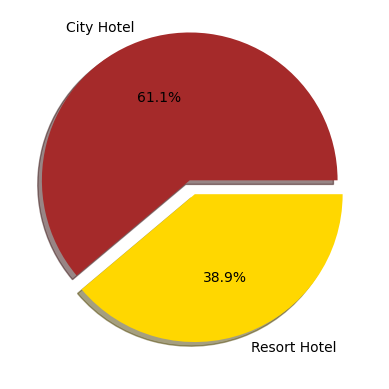

In [22]:
counts = data.groupby(['hotel']).size().reset_index(name = 'No_of_booking')
# print(counts)
total_bookings = counts['No_of_booking'].sum()
counts['Proportions'] = counts['No_of_booking'] / total_bookings
print(counts)

plt.pie(counts['Proportions'], labels = counts['hotel'], autopct='%1.1f%%', colors=['brown', 'gold'], shadow=True, explode=[0.1, 0])
plt.show()

# **Distribution of ADR by Hotel types**

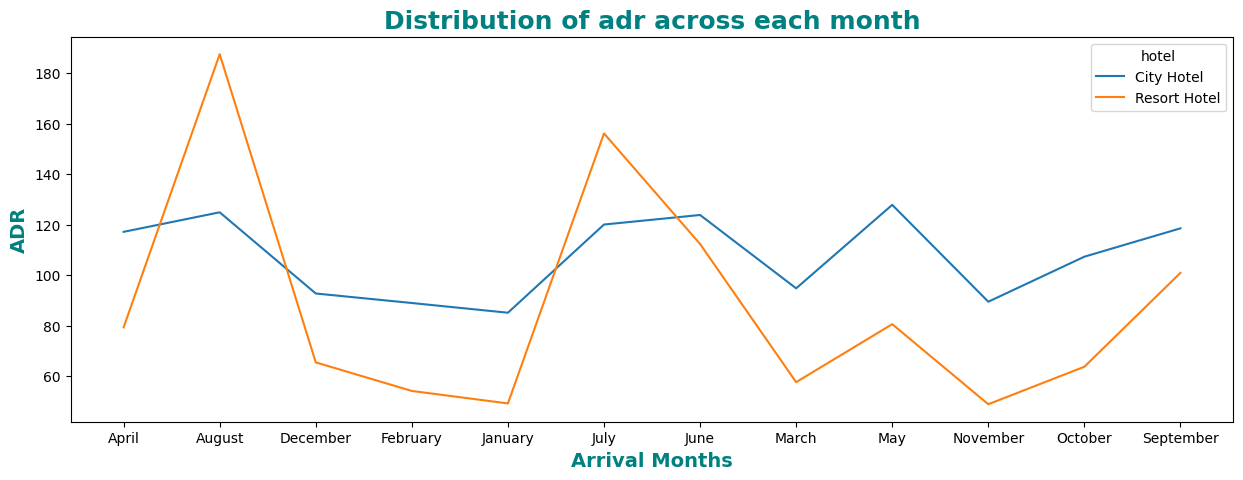

In [23]:
# data['adr'].values
booking_months = data.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()
# print(booking_months)
plt.figure(figsize = (15,5))
plt.title("Distribution of adr across each month", color = 'teal', weight = 'bold', fontsize = 18)
sns.lineplot(x = booking_months['arrival_date_month'], y = booking_months['adr'], hue = booking_months['hotel'])
plt.xlabel('Arrival Months', color = 'teal', weight = 'bold', fontsize = 14)
plt.ylabel('ADR', color = 'teal', weight = 'bold', fontsize = 14)
plt.show()


# **Summary statistics**

In [24]:
stats =  data.groupby('hotel')['adr'].describe()
print(stats)

                count        mean        std   min      25%    50%    75%  \
hotel                                                                       
City Hotel    53428.0  110.985944  48.062518  0.00  84.0000  105.3  134.0   
Resort Hotel  33968.0   99.025346  63.766782 -6.38  51.3925   79.5  134.0   

                 max  
hotel                 
City Hotel    5400.0  
Resort Hotel   508.0  


# **Optimal length of stay in order to get the best daily rate?**

In [26]:
# adding the columns 'stays_in_week_nights' and 'stays_in_weekend_nights'  to calclulate the total stay of a person

data['total_stay'] = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
print(data[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay']].head())


   stays_in_weekend_nights  stays_in_week_nights  total_stay
0                        0                     0           0
1                        0                     0           0
2                        0                     1           1
3                        0                     1           1
4                        0                     2           2


In [27]:
# figuring out the Optimal length of stay

check_adr = data.groupby('total_stay')['adr'].mean().reset_index(name = 'avg_adr')
print(check_adr)

non_zero_df = check_adr[check_adr['avg_adr'] > 0]
optimal_stay_row = non_zero_df.loc[non_zero_df['avg_adr'].idxmin()]
optimal_stay = optimal_stay_row['total_stay']
optimal_adr = optimal_stay_row['avg_adr']
print(f"The optimal length of stay to get the best daily rate is: {optimal_stay} days with an ADR of: {optimal_adr}")

    total_stay     avg_adr
0            0    0.000000
1            1   96.332516
2            2  106.266102
3            3  110.883634
4            4  109.216113
5            5  114.612864
6            6  122.295426
7            7  107.438658
8            8  116.667816
9            9  116.261833
10          10  109.177388
11          11  109.534595
12          12  108.072211
13          13  115.140970
14          14   95.657622
15          15   92.015694
16          16  104.263333
17          17   95.355000
18          18   86.905417
19          19   99.495455
20          20   76.225000
21          21   77.308545
22          22   77.250769
23          23   75.620000
24          24   83.590000
25          25   60.422143
26          26   73.790000
27          27   63.760000
28          28   58.114286
29          29   88.700000
30          30   76.310769
31          33   87.665000
32          34   93.000000
33          35   39.876000
34          38    0.260000
35          42   32.167500
3

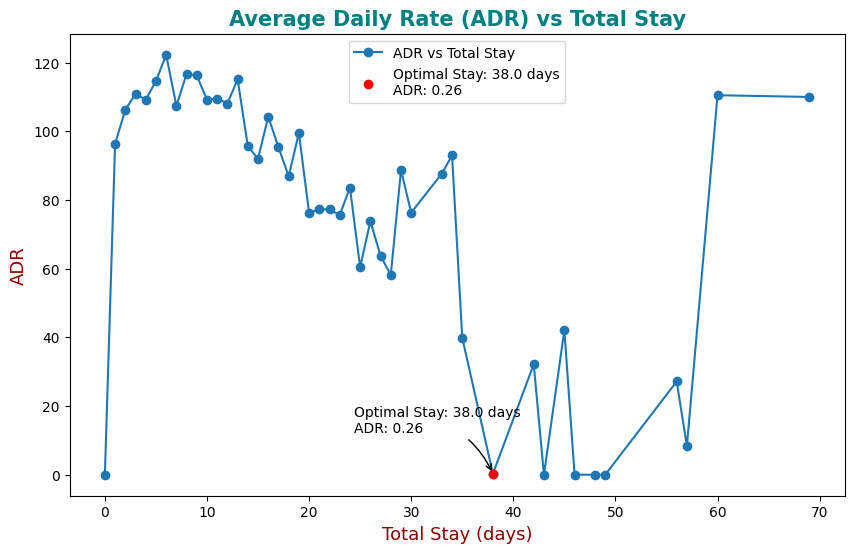

In [28]:
plt.figure(figsize = (10,6))
plt.plot(check_adr['total_stay'], check_adr['avg_adr'], marker='o', label='ADR vs Total Stay')
plt.scatter(optimal_stay, optimal_adr, color='red', zorder=5, label=f'Optimal Stay: {optimal_stay} days\nADR: {optimal_adr}')

# Annotate the optimal point
plt.annotate(f'Optimal Stay: {optimal_stay} days\nADR: {optimal_adr}',
             xy=(optimal_stay, optimal_adr), xycoords='data',
             xytext=(-100, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.2"))

plt.title('Average Daily Rate (ADR) vs Total Stay', color = 'teal', weight = 'bold', fontsize = 15)
plt.xlabel('Total Stay (days)', color = 'darkred', fontsize = 13)
plt.ylabel('ADR', color = 'darkred', fontsize = 13)
plt.legend()
# plt.grid(True)
plt.show()



In [29]:
data['new'] = data['reserved_room_type'] == data['assigned_room_type']
data['new'].value_counts()
data.groupby('hotel')['new'].mean().reset_index()

,hotel,new
0,City Hotel,0.885977
1,Resort Hotel,0.793423


city hotels have more match room rates





# **which country is hosting more number of guests ?**

In [30]:
# Converting datatype of columns 'children' from float to int.
data[['children']] = data[['children']].astype('int64')

data['total_guest'] = data['adults'] + data['children'] + data['babies']
# print(data[['adults', 'children', 'babies', 'total_guest']].head())

guests = data.groupby('country')['total_guest'].size()
max_country = guests.idxmax()
max_value = guests.max()

print(f"Country with the maximum number of guests: {max_country}")
print(f"Maximum number of guests: {max_value}")

Country with the maximum number of guests: PRT
Maximum number of guests: 27453


We can conclude that Portugal have highest number of guests with the count of 27453

# **Distribution of reserved and assigned room type**

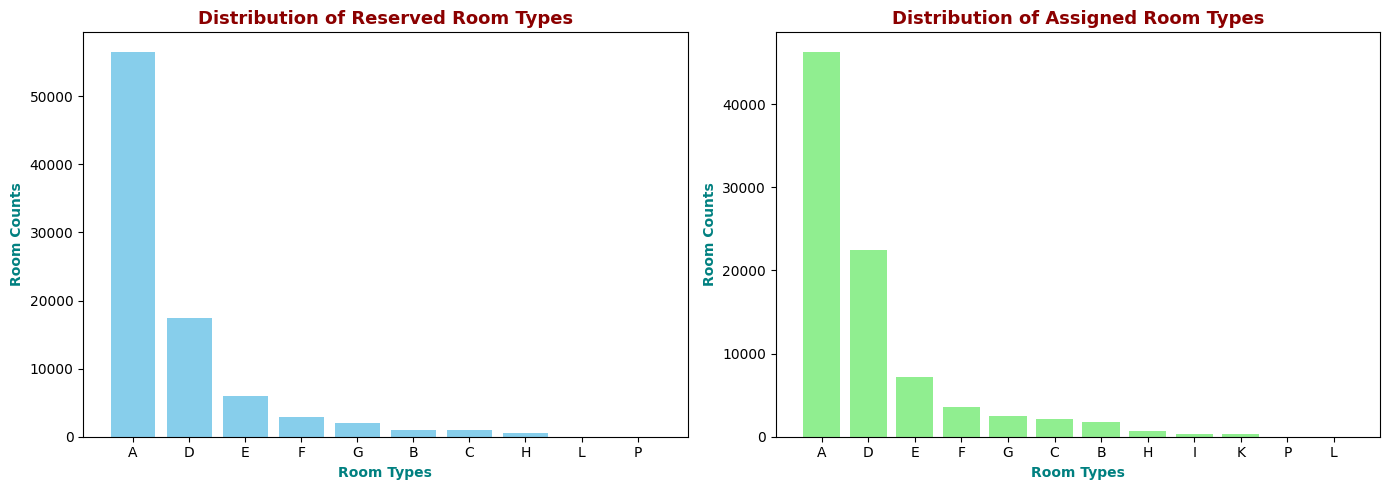

In [31]:
reserved_room_count = data['reserved_room_type'].value_counts().reset_index(name = 'count')
reserved_room_count.columns = ['reserved_room_type', 'count']

assigned_room_count = data['assigned_room_type'].value_counts().reset_index(name = 'count')
assigned_room_count.columns = ['assigned_room_type', 'count']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(reserved_room_count['reserved_room_type'], reserved_room_count['count'], color='skyblue')
axes[0].set_title("Distribution of Reserved Room Types", color='darkred', weight='bold', fontsize=13)
axes[0].set_xlabel("Room Types", color='teal', weight='bold', fontsize=10)
axes[0].set_ylabel("Room Counts", color='teal', weight='bold', fontsize=10)

axes[1].bar(assigned_room_count['assigned_room_type'], assigned_room_count['count'], color='lightgreen')
axes[1].set_title("Distribution of Assigned Room Types", color='darkred', weight='bold', fontsize=13)
axes[1].set_xlabel("Room Types", color='teal', weight='bold', fontsize=10)
axes[1].set_ylabel("Room Counts", color='teal', weight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# **Which meal type is most preffered meal by customers?**

        meal  meal_count
0         BB       67978
1         SC        9481
2         HB        9085
3  Undefined         492
4         FB         360


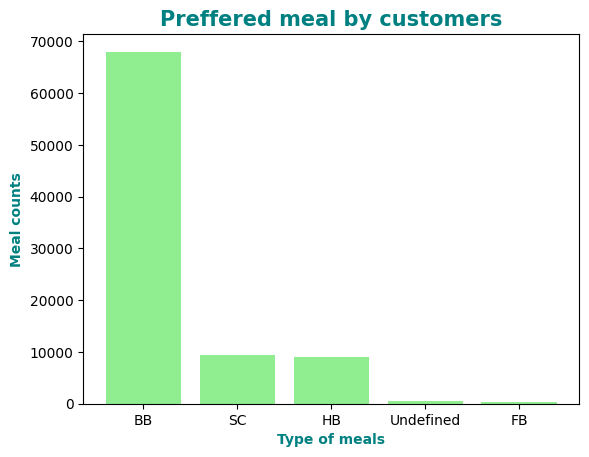

In [32]:
total_meal_count = data['meal'].value_counts().reset_index(name = 'meal_count')
print(total_meal_count)
plt.title("Preffered meal by customers", color = 'teal', weight = 'bold', fontsize = 15 )
plt.bar(total_meal_count['meal'], total_meal_count['meal_count'], color='lightgreen')
plt.xlabel("Type of meals", color = 'teal', weight = 'bold', fontsize = 10)
plt.ylabel("Meal counts", color = 'teal', weight = 'bold', fontsize = 10)
plt.show()

As we can see here from the plot that 'BB' type of meal is mostly preferred by the customers and its counts is 67978.

# **Which types of customers mostly make bookings?**

     customer_type  customer_type_count
0         Contract                 3139
1            Group                  544
2        Transient                71986
3  Transient-Party                11727


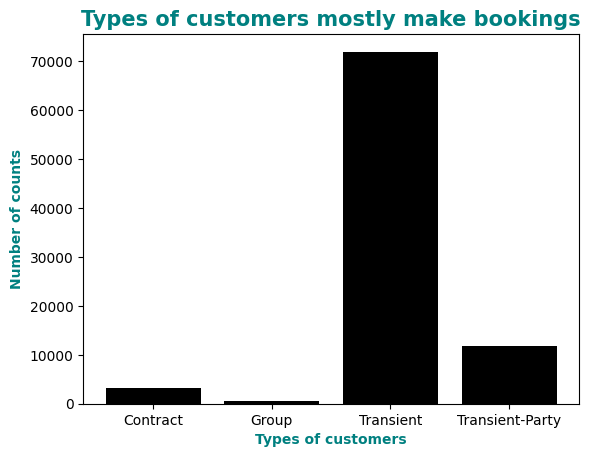

In [34]:
type_of_customers = data.groupby('customer_type').size().reset_index(name = 'customer_type_count')
print(type_of_customers)

plt.title("Types of customers mostly make bookings", color = 'teal', weight = 'bold', fontsize = 15 )
plt.bar(type_of_customers['customer_type'], type_of_customers['customer_type_count'], color='black')
plt.xlabel("Types of customers", color = 'teal', weight = 'bold', fontsize = 10)
plt.ylabel("Number of counts", color = 'teal', weight = 'bold', fontsize = 10)
plt.show()

Transient customers are more frequent visitors.

# **Most common channel for booking hotels.**

  distribution_channel  channel_count
0            Corporate           5081
1               Direct          12988
2                  GDS            181
3                TA/TO          69141
4            Undefined              5


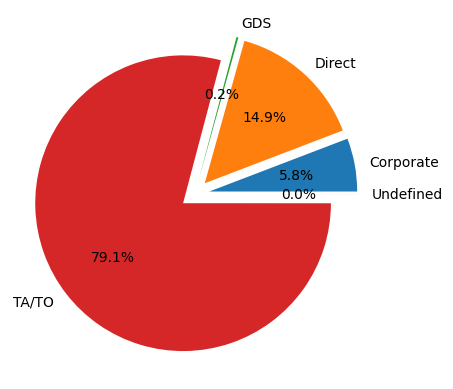

In [35]:
channels = data.groupby('distribution_channel').size().reset_index(name = 'channel_count')
print(channels)
plt.pie(channels['channel_count'], labels = channels['distribution_channel'],
        autopct = '%1.1f%%', explode = [0.1, 0.1, 0.1, 0.1, 0.1])
plt.show()



This suggests that TA/TO channels are the primary drivers of bookings, likely due to their extensive reach and customer base. Direct bookings also contribute significantly, indicating a strong online presence. Corporate bookings and other channels have a smaller but still notable impact. This insight can inform marketing strategies and channel optimization to maximize revenue.